# Convolutional Neural Net with Data Augmentation
In this notebook we create our first predictive model and evaluate our performance.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from tensorflow.keras.applications.resnet_v2 import ResNet50V2

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense, Conv2D, MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

from sklearn.metrics import classification_report, multilabel_confusion_matrix

# Using Data Augmentation 

In [2]:
# All images will be rescaled by 1./255
batch_size = 32
epoch_num = 50

In [3]:
train_val_datagen = ImageDataGenerator(rescale=1./255,
                                       rotation_range=40,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode='nearest',
                                       validation_split=0.20)

In [5]:
train_generator = gen.flow_from_directory(image_directory,
                                          color_mode='grayscale',
                                          subset='training',
                                          class_mode='categorical',
                                          batch_size= batch_size,
                                          target_size=(244, 244))

val_generator = train_val_datagen.flow_from_directory('../images/incoming_images/',
                                                      color_mode='grayscale',
                                                      subset='validation',
                                                      class_mode='categorical',
                                                      batch_size= batch_size,
                                                      target_size=(244, 244))

Found 656 images belonging to 5 classes.
Found 163 images belonging to 5 classes.


In [6]:
train_generator.num_classes

5

In [12]:
train_generator.image_shape

(244, 244, 1)

In [23]:
model_history = {
    'acc':[],
    'val_acc': [],
    'loss': [],
    'val_loss': []
}

In [24]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=train_generator.image_shape))
model.add(MaxPooling2D(2))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.50))
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.50))
model.add(Dense(train_generator.num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [27]:
history_new = model.fit_generator(train_generator,
                              steps_per_epoch=train_generator.n / batch_size,
                              epochs=epoch_num,
                              validation_data=val_generator,
                              validation_steps=val_generator.n / batch_size,
                              verbose=1)

Epoch 1/50
21/20 [==============================] - 30s 1s/step - loss: 1.1522 - acc: 0.5290 - val_loss: 1.2954 - val_acc: 0.4785
Epoch 2/50
21/20 [==============================] - 29s 1s/step - loss: 1.2131 - acc: 0.5168 - val_loss: 1.3089 - val_acc: 0.5092
Epoch 3/50
21/20 [==============================] - 30s 1s/step - loss: 1.1737 - acc: 0.5244 - val_loss: 1.4158 - val_acc: 0.4785
Epoch 4/50
21/20 [==============================] - 31s 1s/step - loss: 1.1791 - acc: 0.5564 - val_loss: 1.3409 - val_acc: 0.5092
Epoch 5/50
21/20 [==============================] - 30s 1s/step - loss: 1.1368 - acc: 0.5244 - val_loss: 1.4704 - val_acc: 0.5276
Epoch 6/50
21/20 [==============================] - 30s 1s/step - loss: 1.1649 - acc: 0.5503 - val_loss: 1.4685 - val_acc: 0.4969
Epoch 7/50
21/20 [==============================] - 35s 2s/step - loss: 1.1399 - acc: 0.5488 - val_loss: 1.4641 - val_acc: 0.4663
Epoch 8/50
21/20 [==============================] - 31s 1s/step - loss: 1.1589 - acc: 0.55

21/20 [==============================] - 31s 1s/step - loss: 1.0071 - acc: 0.6082 - val_loss: 1.4278 - val_acc: 0.6012
Epoch 39/50
21/20 [==============================] - 32s 2s/step - loss: 0.9414 - acc: 0.6524 - val_loss: 1.2227 - val_acc: 0.6503
Epoch 40/50
21/20 [==============================] - 32s 2s/step - loss: 0.9746 - acc: 0.6326 - val_loss: 1.3853 - val_acc: 0.5460
Epoch 41/50
21/20 [==============================] - 31s 1s/step - loss: 1.0187 - acc: 0.6296 - val_loss: 1.3413 - val_acc: 0.5399
Epoch 42/50
21/20 [==============================] - 32s 2s/step - loss: 0.9889 - acc: 0.6235 - val_loss: 1.4920 - val_acc: 0.6012
Epoch 43/50
21/20 [==============================] - 32s 2s/step - loss: 0.9619 - acc: 0.6387 - val_loss: 1.2701 - val_acc: 0.6012
Epoch 44/50
21/20 [==============================] - 32s 2s/step - loss: 0.9880 - acc: 0.6265 - val_loss: 1.3078 - val_acc: 0.6196
Epoch 45/50
21/20 [==============================] - 35s 2s/step - loss: 0.9727 - acc: 0.6250 -

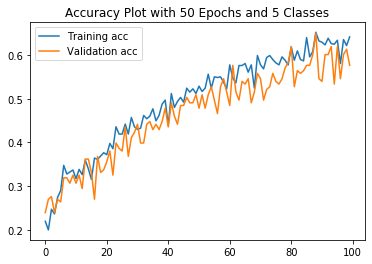

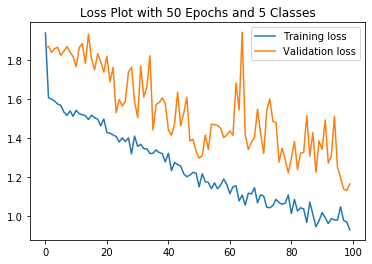

In [28]:
for key in history_new.history.keys():
    model_history[key] += history_new.history[key]

plt.plot(model_history['acc'], label = 'Training acc')
plt.plot(model_history['val_acc'], label = 'Validation acc')
plt.title(f"Accuracy Plot with {epoch_num} Epochs and {train_generator.num_classes} Classes")
plt.legend()
plt.show();


plt.plot(model_history['loss'], label = 'Training loss')
plt.plot(model_history['val_loss'], label = 'Validation loss')
plt.title(f"Loss Plot with {epoch_num} Epochs and {train_generator.num_classes} Classes")
plt.legend()
plt.show();

## Plotting Confusion Matrices 

In [18]:
poses = os.listdir('../images/incoming_images/')[1:]
poses

['warrior_iii',
 'warrior_ii',
 'crow',
 'downward_facing_dog',
 'supported_shoulder_stand']

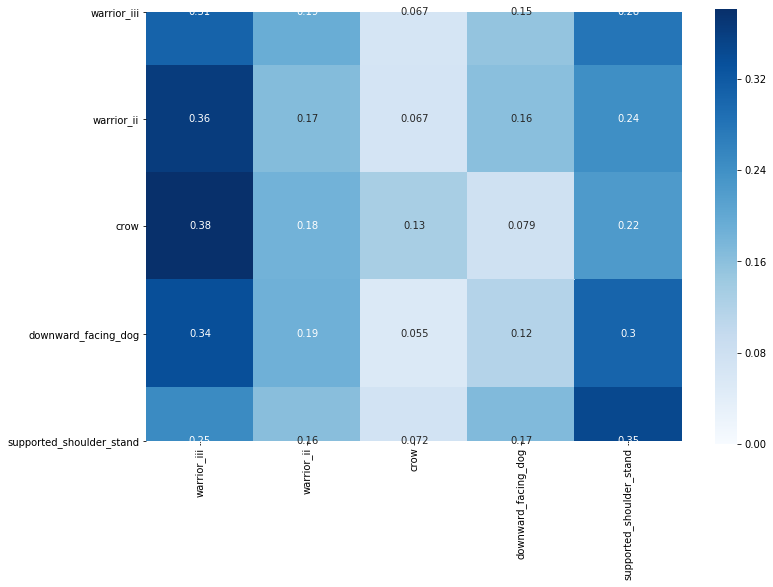

In [20]:
generator = train_generator
preds = model.predict_generator(generator)

y_true = generator.classes

y_preds = [np.argmax(pred) for pred in preds]

con_mat = confusion_matrix(y_true, y_preds)
plot_mat = [[item/np.sum(row) for item in row] for row in con_mat]

plt.figure(figsize=(12,8))
sns.heatmap(plot_mat,
            xticklabels=poses, 
            yticklabels=poses, 
            annot=True,
            square=True,
            vmin=0,
#             vmax=1,
            cmap='Blues');

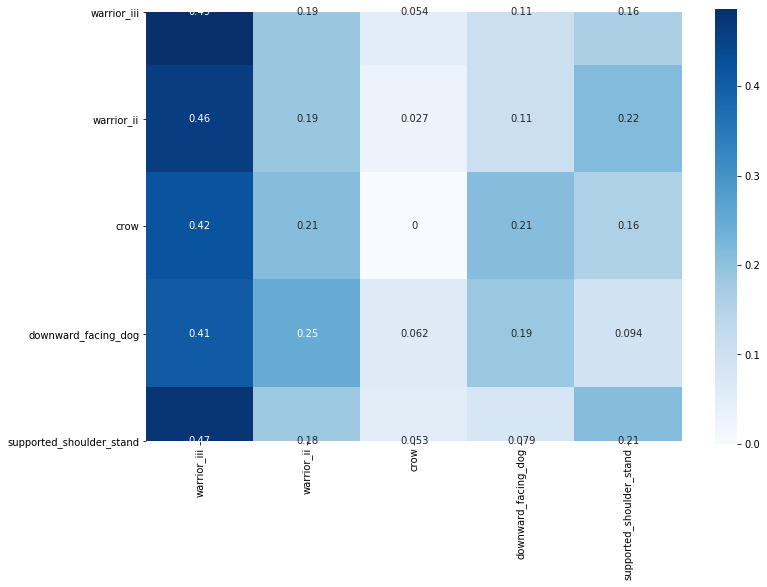

In [21]:
generator = val_generator
preds = model.predict_generator(generator)

y_true = generator.classes

y_preds = [np.argmax(pred) for pred in preds]


con_mat = confusion_matrix(y_true, y_preds)
plot_mat = [[item/np.sum(row) for item in row] for row in con_mat]

plt.figure(figsize=(12,8))
sns.heatmap(plot_mat,
            xticklabels=poses, 
            yticklabels=poses, 
            annot=True,
            square=True,
            vmin=0,
#             annot_kws={"size":12},
#             vmax=1,
            cmap='Blues');


In [22]:
title  = f'../models/cnn_'
title += f'2layers_'
title += f'{train_generator.num_classes}classes_'
title += f'{len(model_history["acc"])}epoch_'
title += f'augmentedv1.h5'

In [94]:
model.save(title)

In [95]:
len(model_history['acc'])

150